In [22]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

import seaborn as sns
import warnings
from scipy import stats
import numpy as np
%matplotlib inline

In [23]:
df = pd.read_csv('./datasets/이상치제거csv/이상치제거전.csv',index_col=0)

In [4]:
print(df.columns)
배당기업 = df[df['target']==1]
a = df[df['회계년도']==2021]
train = df[df['회계년도']>=2020]
test = df[df['회계년도']<=2019]

Index(['회사명', '거래소코드', '회계년도', '대주주지분변화분', '외국인지분분변화', '상장일', '자산',
       '당기순이익(손실)', '비유동자산증가율', '유동자산증가율', '자기자본증가율', '매출액증가율', '정상영업이익증가율',
       '순이익증가율', '총포괄이익증가율', '매출액순이익률', '총자본순이익률', '자기자본순이익률', '매출원가대매출액비율',
       '광고선전비대매출액비율', '유보율', '비유동비율', '유동비율', '당좌비율', '현금비율', '부채비율', '유동부채비율',
       '차입금비율', '이자보상배율(이자비용)', '유보액대비율', '유보액대납입자본배율', '투자집중도',
       '통계청 한국표준산업분류 10차(대분류)', '1인년간평균급여(직원)', '토빈Q', 'target', 'WW지수', 'RDS',
       '수명주기', '산업평균_총자산증가율차분', '보통주식비율', '외국인_주식분포비율', '업력'],
      dtype='object')


c:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


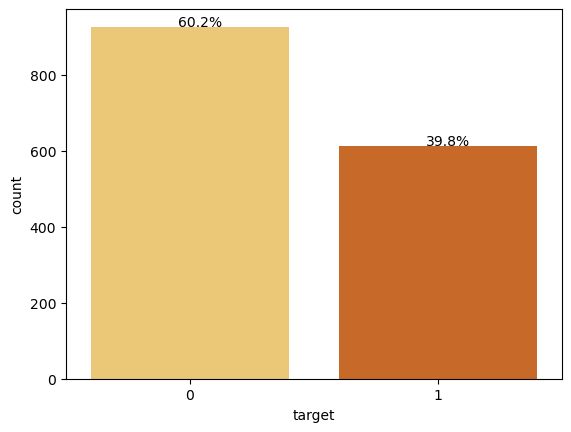

In [5]:
## 배당을안정적으로 하는수와 아닌수
plt.figure()
ax = sns.countplot(train['target'], palette='YlOrBr')
total = len(train['target'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

c:\Users\msi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


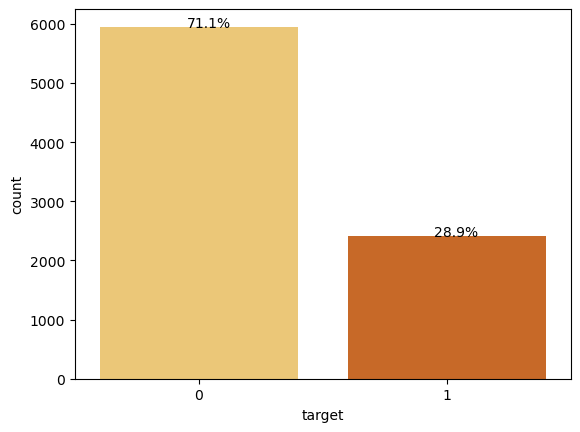

In [6]:
## 배당을안정적으로 하는수와 아닌수
plt.figure()
ax = sns.countplot(test['target'], palette='YlOrBr')
total = len(test['target'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

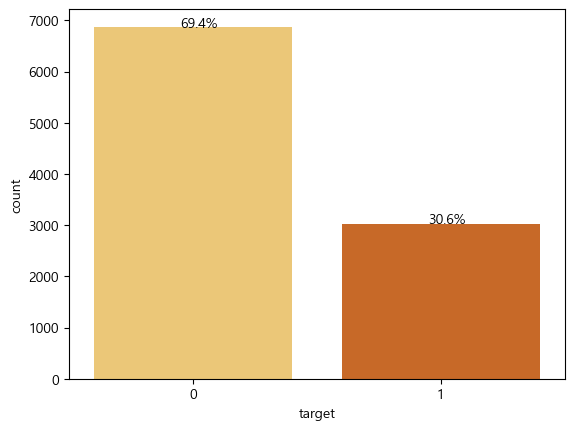

In [12]:
## 배당을안정적으로 하는수와 아닌수
plt.figure()
ax = sns.countplot(df['target'], palette='YlOrBr')
total = len(df['target'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height() + 0.5
    ax.annotate(percentage, (x, y))

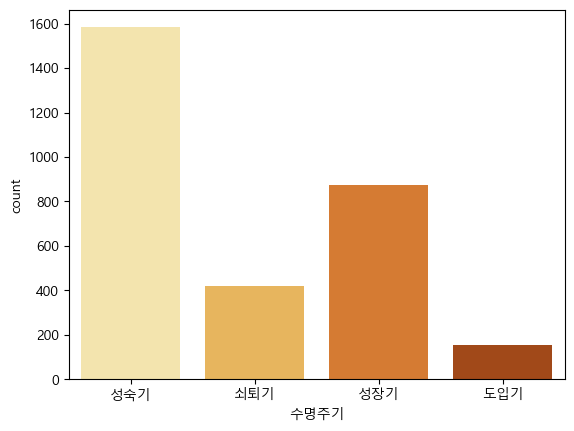

성숙기    4396
성장기    2943
쇠퇴기    1805
도입기     763
Name: 수명주기, dtype: int64


In [11]:
## 기업수명주기 별 배당을 꾸준히 주는 기업 시각화
plt.figure()
warnings.simplefilter(action='ignore', category=FutureWarning)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
sns.countplot(배당기업['수명주기'],palette='YlOrBr')
plt.show()

print(df['수명주기'].value_counts())

In [8]:
df['수명주기'].value_counts()

성숙기    4396
성장기    2943
쇠퇴기    1805
도입기     763
Name: 수명주기, dtype: int64

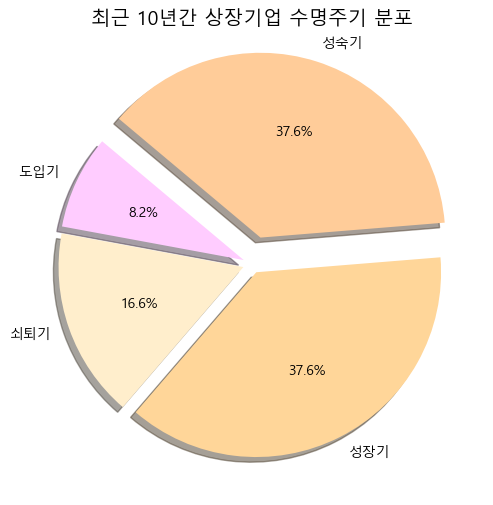

In [38]:
ratio = [(37.6),(37.6),(16.6),(8.2)]
labels = ['성숙기', '성장기', '쇠퇴기', '도입기']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ffcc99', '#ffd699', '#ffeecc', '#ffccff']
idx = np.argmax(ratio)
explode[idx] = 0.15

plt.figure(figsize=(6, 6))
plt.title('최근 10년간 상장기업 수명주기 분포', fontsize=14)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=140-idx*90, counterclock=False, 
        explode=explode, shadow=True, colors=colors)
plt.show()


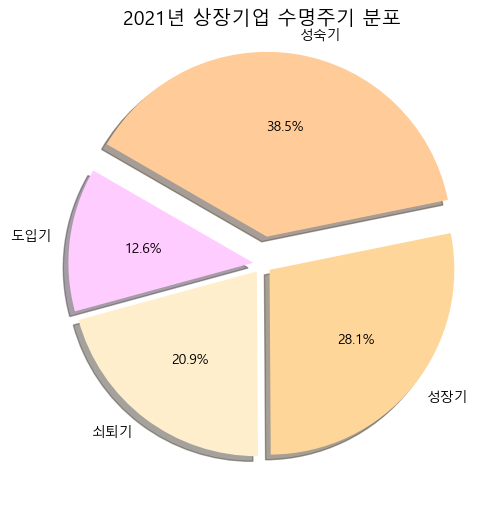

In [18]:
ratio = [(496/1289),(362/1289),(269/1289),(162/1289)]
labels = ['성숙기', '성장기', '쇠퇴기', '도입기']
explode = [0.05, 0.05, 0.05, 0.05]
colors = ['#ffcc99', '#ffd699', '#ffeecc', '#ffccff']
idx = np.argmax(ratio)
explode[idx] = 0.15

plt.figure(figsize=(6, 6))
plt.title('2021년 상장기업 수명주기 분포', fontsize=14)
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=150-idx*90, counterclock=False, 
        explode=explode, shadow=True, colors=colors)
plt.show()


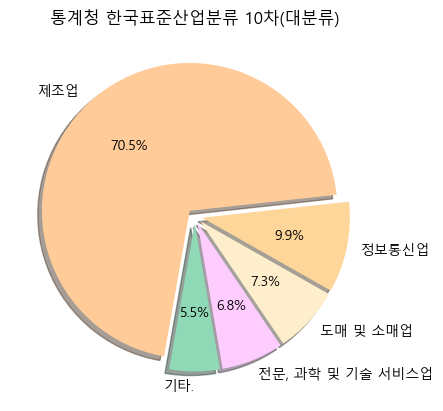

In [19]:
ratio = [(8951/13072),(1261/13072),(928/13072),(861/13072),(697/13072)]
labels = ['제조업', '정보통신업', '도매 및 소매업', '전문, 과학 및 기술 서비스업','기타.']
explode = [0.05, 0.05, 0.05, 0.05,0.05]
colors = ['#ffcc99', '#ffd699', '#ffeecc', '#ffccff','#8fd9b6']

plt.title('통계청 한국표준산업분류 10차(대분류)')
plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors)
plt.show()

In [62]:
수명주기 = pd.get_dummies(df['수명주기'])
대분류수명주기= df.drop(['수명주기'],axis=1)
대분류수명주기 = pd.concat([대분류수명주기,수명주기],axis=1)

In [68]:
도입기= 대분류수명주기.groupby(['통계청 한국표준산업분류 10차(대분류)'])[['도입기']].sum()
성장기= 대분류수명주기.groupby(['통계청 한국표준산업분류 10차(대분류)'])[['성장기']].sum()
성숙기= 대분류수명주기.groupby(['통계청 한국표준산업분류 10차(대분류)'])[['성숙기']].sum()
쇠퇴기= 대분류수명주기.groupby(['통계청 한국표준산업분류 10차(대분류)'])[['쇠퇴기']].sum()
기업수명주기 = pd.concat([도입기,성장기,성숙기,쇠퇴기],axis=1)
기업수명주기

,도입기,성장기,성숙기,쇠퇴기
통계청 한국표준산업분류 10차(대분류),,,,
건설업,47.0,72.0,138.0,117.0
교육 서비스업,0.0,17.0,64.0,12.0
"농업, 임업 및 어업",5.0,12.0,18.0,14.0
도매 및 소매업,117.0,250.0,316.0,245.0
부동산업,5.0,3.0,1.0,1.0
"사업시설 관리, 사업 지원 및 임대 서비스업",6.0,37.0,68.0,26.0
"수도, 하수 및 폐기물 처리, 원료 재생업",1.0,5.0,11.0,3.0
숙박 및 음식점업,3.0,13.0,10.0,1.0
"예술, 스포츠 및 여가관련 서비스업",1.0,12.0,21.0,3.0
